#### # - - - - - - - - - - - - - - - # ##
####                Gather Data
#### # - - - - - - - - - - - - - - - # ##

In [2]:
# model.ipynb
# NN model that generates italian names from dataset
# sid@lapentop:~/home/sid/10 - UB/12 - semester 2/12.01 - NLP/assignment 2/

import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures

################################
#### Globals
################################

groups = ["1999_f",
         "1999_m",
         "2014_f",
         "2014_m"]

paths = ["data/1999_f.txt",
         "data/1999_m.txt",
         "data/2014_f.txt",
         "data/2014_m.txt"]

data = {}
data_dict = {}
block_size = 3

################################
#### Change value to test different models
model = groups[0]
################################

# Create dictionary for all data
# Key = name of set (e.g. 1999_f)
# Value = list of all names in set
for i, path in enumerate(paths):
    word_list = []
    with open(path, "r") as file:
        file_contents = file.readlines()
        for line in file_contents:
            word_list.append(line)
    data_dict[i] = word_list

# Build the vocabulary of characters and mappings to/from integers
def char_vocab(song_list):
    chars = sorted(list(set(''.join(song_list))))
    char_to_index = {ch: idx + 1 for idx, ch in enumerate(chars)}
    char_to_index['.'] = 0
    index_to_char = {idx: ch for ch, idx in char_to_index.items()}
    return char_to_index, index_to_char

# Func for building data into tensors
def build_dataset(words):
    X, Y = [], []
    for word in words:
        #print(w)
        context = [0] * block_size
        for character in word + '.':
            idx = char_to_index[character]
            X.append(context)
            Y.append(idx)
            context = context[1:] + [idx] # crop and append
    print("dave", len(X),len(Y))
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

# Iterate through each set of data
# Create a dict that has training/test split for all sets
for i, words in (data_dict.items()):
    char_to_index, index_to_char = char_vocab(words)
    print(i, (char_to_index))

    random.seed(42)
    random.shuffle(words)
    n1 = int(0.8*len(words))
    n2 = int(0.9*len(words))

    Xtr, Ytr = build_dataset(words[:n1])
    Xdev, Ydev = build_dataset(words[n1:n2])
    Xte, Yte = build_dataset(words[n2:])

    # Take equal lengths of each set of data
    data[groups[i]] = {
            'Xtr': Xtr[:1200000],
            'Ytr': Ytr[:1200000],
            'Xdev': Xdev[:150000],
            'Ydev': Ydev[:150000],
            'Xte': Xte[:150000],
            'Yte': Yte[:150000]}

0 {'\n': 1, '-': 2, 'A': 3, 'B': 4, 'C': 5, 'D': 6, 'E': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26, 'Y': 27, 'Z': 28, 'a': 29, 'b': 30, 'c': 31, 'd': 32, 'e': 33, 'f': 34, 'g': 35, 'h': 36, 'i': 37, 'j': 38, 'k': 39, 'l': 40, 'm': 41, 'n': 42, 'o': 43, 'p': 44, 'q': 45, 'r': 46, 's': 47, 't': 48, 'u': 49, 'v': 50, 'w': 51, 'x': 52, 'y': 53, 'z': 54, '.': 0}
dave 1651461 1651461
dave 206534 206534
dave 206502 206502
1 {'\n': 1, '-': 2, 'A': 3, 'B': 4, 'C': 5, 'D': 6, 'E': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26, 'Y': 27, 'Z': 28, 'a': 29, 'b': 30, 'c': 31, 'd': 32, 'e': 33, 'f': 34, 'g': 35, 'h': 36, 'i': 37, 'j': 38, 'k': 39, 'l': 40, 'm': 41, 'n': 42, 'o': 43, 'p': 44, 'q': 45, 'r': 46, 's': 47, 't': 48, 'u': 49, 'v': 50, 'w': 51

#### # - - - - - - - - - - - - - - - # ##
####                MODEL
#### # - - - - - - - - - - - - - - - # ##

In [3]:
# Building model architecture
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((55, 10), generator=g)
W1 = torch.randn((30, 30), generator=g)
b1 = torch.randn(30, generator=g)
W2 = torch.randn((30, 55), generator=g)
b2 = torch.randn(55, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

lri = []
lossi = []
stepi = []


#### # - - - - - - - - - - - - - - - # ##
####                Train model
#### # - - - - - - - - - - - - - - - # ##

In [4]:
# Initialise the variables for the correct model
Xtr = data[model]["Xtr"]
Ytr = data[model]["Ytr"]
Xdev = data[model]["Xdev"]
Ydev = data[model]["Ydev"]
Xte = data[model]["Xte"]
Yte = data[model]["Yte"]

In [5]:
def train_model(Xtr, Ytr):
    for i in range(100000):

        # minibatch construct
        ix = torch.randint(0, Xtr.shape[0], (55,))

        # forward pass
        emb = C[Xtr[ix]] # (32, 3, 2)
        h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
        logits = h @ W2 + b2 # (32, 27)
        loss = F.cross_entropy(logits, Ytr[ix])
        #print(loss.item())
        if i % 10 ==0:
            print(i, loss.item())

        # backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # update
        #lr = lrs[i]
        lr = 0.1 if i < 100000 else 0.01
        for p in parameters:
            p.data += -lr * p.grad

        # track stats
        #lri.append(lre[i])
        stepi.append(i)
        lossi.append(loss.log10().item())


# Call the model func to train it
train_model(Xtr, Ytr)

0 11.858935356140137
10 9.36347770690918
20 8.639437675476074
30 6.776377201080322
40 4.7151055335998535
50 4.591043472290039
60 5.328590393066406
70 6.083004474639893
80 4.643189430236816
90 4.318413734436035
100 3.0218453407287598
110 3.660979747772217
120 4.096595287322998
130 2.849480390548706
140 2.7642405033111572
150 2.631495714187622
160 3.262392520904541


170 3.4035933017730713
180 2.922205924987793
190 2.232011556625366
200 3.619575262069702
210 2.6691043376922607
220 2.9262218475341797
230 2.686169385910034
240 2.9196932315826416
250 1.988183856010437
260 2.9771437644958496
270 1.864492654800415
280 2.0813674926757812
290 2.9435410499572754
300 1.6437662839889526
310 2.280445098876953
320 2.8655736446380615
330 2.244438409805298
340 1.9337341785430908
350 3.3424854278564453
360 2.306978225708008
370 2.2731142044067383
380 1.8611754179000854
390 2.535599946975708
400 1.3797249794006348
410 1.6632163524627686
420 2.077219247817993
430 2.6628129482269287
440 1.8325387239456177
450 2.140108585357666
460 2.374685764312744
470 1.9045817852020264
480 1.8727906942367554
490 2.4484341144561768
500 1.7831953763961792
510 1.2776834964752197
520 1.2370471954345703
530 2.128798723220825
540 2.396456241607666
550 2.229532480239868
560 2.031994342803955
570 2.158607244491577
580 1.950679898262024
590 1.4943057298660278
600 1.980934739112854
610 1.49

#### # - - - - - - - - - - - - - - - # ##
####                Output
#### # - - - - - - - - - - - - - - - # ##

In [6]:
# Print 50 sample names from the model
# Save a file of 10000 names for each model

names = []

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10000):
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])]
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    names.append((''.join(index_to_char[i] for i in out)).replace(".",""))

file_path = f"output/{model}_output.txt"
with open(file_path, 'w') as f:
    for item in names:
        f.write("%s" % item)

print(names[:50])

['Cona\n', 'Ka\n', 'Francesca\n', 'Mariulia\n', 'Chiara\n', 'Matita\n', 'Jessandra\n', 'Sara\n', 'Sabrisulatalianna\n', 'Anna\n', 'Enbessailm\n', 'Amily\n', 'Caronica\n', 'DeSma\n', 'Aurosara\n', 'Giorgia\n', 'Federia\n', 'Federica\n', 'Srika\n', 'Ermaria\n', 'Anna\n', 'Emanatera\n', 'Vigenia\n', 'Cornacla\n', 'Sharonia\n', 'Laura\n', 'Angela\n', 'Noemi\n', 'Alica\n', 'Dania\n', 'Elisa\n', 'Alessia\n', 'Giorgia\n', 'Carhio\n', 'Lorexara\n', 'Francesca\n', 'Erica\n', 'Rebecca\n', 'Francesca\n', 'Erika\n', 'Giulia\n', 'Debecca\n', 'Mariam\n', 'Lorene\n', 'Nadia\n', 'Eida\n', 'Aurorancesca\n', 'Rebecia\n', 'Cia\n', 'Anteborancesca\n']


#### # - - - - - - - - - - - - - - - # ##
####                Loss
#### # - - - - - - - - - - - - - - - # ##

In [7]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(0.9077, grad_fn=<NllLossBackward0>)

In [8]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(0.9127, grad_fn=<NllLossBackward0>)

In [9]:
# test loss

emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(0.9099, grad_fn=<NllLossBackward0>)

#### # - - - - - - - - - - - - - - - # ##
####               Results analysis
#### # - - - - - - - - - - - - - - - # ##

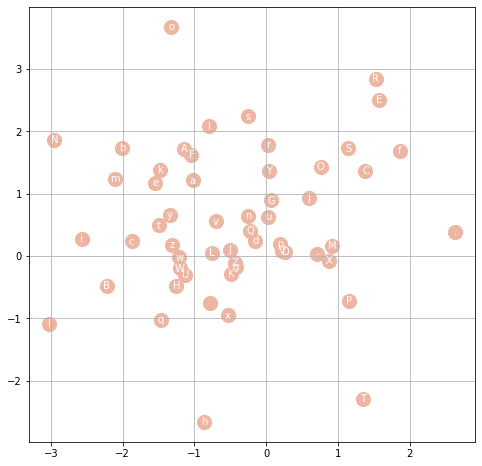

In [10]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200,  color = "#EDB6A3")
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), index_to_char[i], ha="center", va="center", color='white')
plt.grid('minor')

### Average names length

In [11]:
def average_word_length(original_names):
    word_lengths = [len(word) for word in original_names] 
    if word_lengths:  
        return sum(word_lengths) / len(word_lengths)  
    else:
        return 0  
# We defined the variable "average_word_length", which measure the length of each names and returns the average length, or 0 in the text is empty

In [12]:
# Calculates the average length of names
# Returns original vs output averages for all 4 sets

original_names_list = []
for datasets in data_dict.values():
    original_names_list.append(datasets)

output_names_list = [open("output/1999_f_output.txt", 'r'),
                     open("output/1999_m_output.txt", 'r'),
                     open("output/2014_f_output.txt", 'r'),
                     open("output/2014_m_output.txt", 'r')]


avg_length_original = []
avg_length_output = []

for on, ou in zip(original_names_list, output_names_list):
    avg_length_on = average_word_length(on)
    avg_length_original.append(avg_length_on)

    avg_length_ou = average_word_length(ou)
    avg_length_output.append(avg_length_ou)

    print(f"average original names length", avg_length_on, f"whilst average output names length", avg_length_ou)

average original names length 7.7840843817944325 whilst average output names length 7.888588588588589
average original names length 8.121696373693915 whilst average output names length 8.179635927185437
average original names length 7.40974375638288 whilst average output names length 7.171282871712829
average original names length 8.18798503295476 whilst average output names length 8.178614337204646


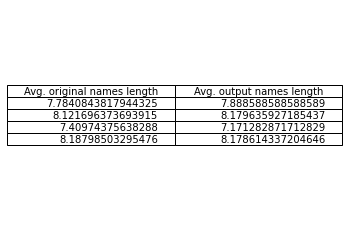

In [13]:
import matplotlib.pyplot as plt
import numpy as np

table_data = [avg_length_original, avg_length_output]
table_data_transposed = np.array(table_data).T

column_labels = ['Avg. original names length', 'Avg. output names length']

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data_transposed, colLabels=column_labels, loc='center')

plt.show()

### Frequency of names

In [14]:
# Opens original dataset file
# Finds the frequency percentage for the 5 most common names

import pandas as pd

# Read the CSV file
df = pd.read_csv("data/original.csv")  # Assuming tab-separated, adjust delimiter as needed

# Filter the data for each combination of year and gender, and find the top 5 names with highest percentage
common_names_or_1999 = []
common_names_or_2014 = []

for year in [1999, 2014]:
    for gender in ['m', 'f']:
        df_filtered = df[(df['year'] == year) & (df['gender'] == gender)]
        top_names = df_filtered.sort_values(by='percent', ascending=False).head(5)
        names_with_frequency = [f"{row['name']}, {row['percent']:.2f}" for index, row in top_names.iterrows()]
        if year == 1999:
            common_names_or_1999.extend(names_with_frequency)
        elif year == 2014:
            common_names_or_2014.extend(names_with_frequency)


In [15]:
# Opens output files of names
# Calculates the frequency of each name
# Saves the top 5 most common names and their percentage

from collections import Counter

def freq_names(names):
    names_frequency = Counter(names)
    most_common_names = names_frequency.most_common(5)
    return most_common_names

output_names_list = [open("output/1999_f_output.txt", 'r'),
                     open("output/1999_m_output.txt", 'r'),
                     open("output/2014_f_output.txt", 'r'),
                     open("output/2014_m_output.txt", 'r')]

common1999 = []
common2014 = []

count = 0

for file in output_names_list:
    names = freq_names(file)
    if count <= 1:
        common1999.extend(names)
    else:
        common2014.extend(names)

    count += 1

common_names_ou_1999 = [f"'{name.strip()}, {frequency/100}'" for name, frequency in common1999]
common_names_ou_2014 = [f"'{name.strip()}, {frequency/100}'" for name, frequency in common2014]


["'Chiara, 3.79'", "'Martina, 3.2'", "'Giulia, 3.12'", "'Francesca, 2.67'", "'Anna, 2.25'", "'Marco, 4.0'", "'Francesco, 3.71'", "'Luca, 3.63'", "'Matteo, 2.57'", "'Andrea, 2.34'"]


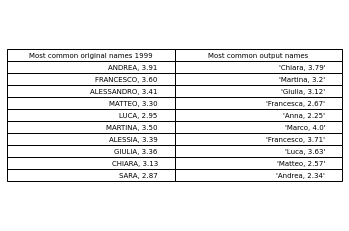

In [16]:
# Generate table for the 10 most common names of 1999
# Comparing the percentage found in original vs output

table_data = [common_names_or_1999, common_names_ou_1999]
table_data_transposed = np.array(table_data).T

print(common_names_ou_1999)

column_labels = ['Most common original names 1999', 'Most common output names']
# We assigned the labels to the columns 

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data_transposed, colLabels=column_labels, loc='center')
# We created the table 

plt.show()
# We showed it

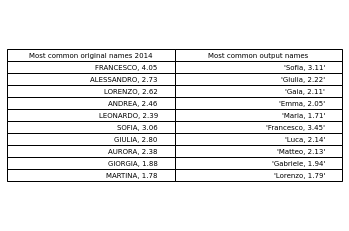

In [17]:
# Generate table for the 10 most common names of 1999
# Comparing the percentage found in original vs output

table_data = [common_names_or_2014, common_names_ou_2014]
table_data_transposed = np.array(table_data).T

column_labels = ['Most common original names 2014', 'Most common output names']

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_data_transposed, colLabels=column_labels, loc='center')

plt.show()

### Number of common names between original and output names

In [18]:
def count_common_names(file1_path, file2_path):
  
    with open(file1_path, "r") as file1:
        names1 = set(file1.read().splitlines())

    with open(file2_path, "r") as file2:
        names2 = set(file2.read().splitlines())

    num_common_names = len(names1.intersection(names2))

    return num_common_names

# We defined a variable which returns the number of the common names comparing the original data and the output data, measuring the intersection between the two files

In [19]:

num_common_names = count_common_names("data/1999_f.txt", "output/1999_f_output.txt")
print("Number of common female names 1999:", num_common_names)

Number of common female names 1999: 280


In [20]:
num_common_names = count_common_names("data/1999_m.txt", "output/1999_m_output.txt")
print("Number of common male names 1999:", num_common_names)

Number of common male names 1999: 209


In [21]:
num_common_names = count_common_names("data/2014_f.txt", "output/2014_f_output.txt")
print("Number of common female names 2014:", num_common_names)

Number of common female names 2014: 302


In [22]:
num_common_names = count_common_names("data/2014_m.txt", "output/2014_m_output.txt")
print("Number of common male names 2014:", num_common_names)

Number of common male names 2014: 205


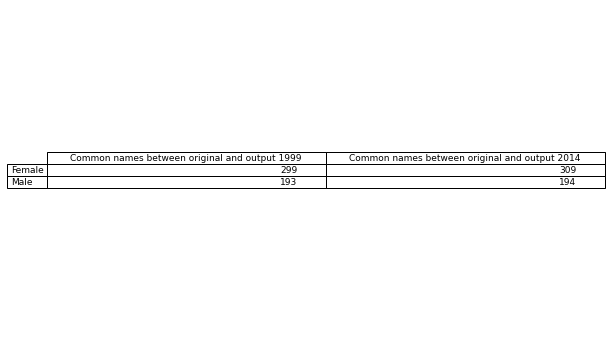

In [25]:
# Create a table to represent the number of common names between the two years and gender
import matplotlib.pyplot as plt

# Data for number of common names between 1999 and 2014 by gender
number_common_names_1999 = ["299", "193"]
number_common_names_2014 = ["309", "194"]

# Transpose the data for easier table creation
table_data = [number_common_names_1999, number_common_names_2014]
table_data_transposed = list(map(list, zip(*table_data)))

# Labels for columns and rows
column_labels = ['Common names between original and output 1999', 'Common names between original and output 2014']
row_labels = ["Female", "Male"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Turn off axis
ax.axis('off')

# Create the table
table = ax.table(cellText=table_data_transposed, colLabels=column_labels, rowLabels=row_labels, loc='center')

# Display the plot
plt.show()
